In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import gradio as gr


In [8]:
# Step 2: Load Data
train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")

train_df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [38]:
train_df.tail()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


In [36]:
# Step 3: Preprocessing

# Extract features and target
symptom_columns = train_df.columns[:-1]       # All columns except 'prognosis'
X = train_df[symptom_columns].copy()
y = train_df['prognosis'].copy()

# Ensure all features are numeric (0/1)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [22]:
# Step 4: Model Training

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# Step 5: Evaluation

y_pred = model.predict(X_val)
print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\n📋 Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=le.classes_))


✅ Accuracy: 1.0

📋 Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00     

C:\Users\Asus\AppData\Local\Temp\ipykernel_40580\1888233468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts[:20].values, y=symptom_counts[:20].index, palette="viridis")


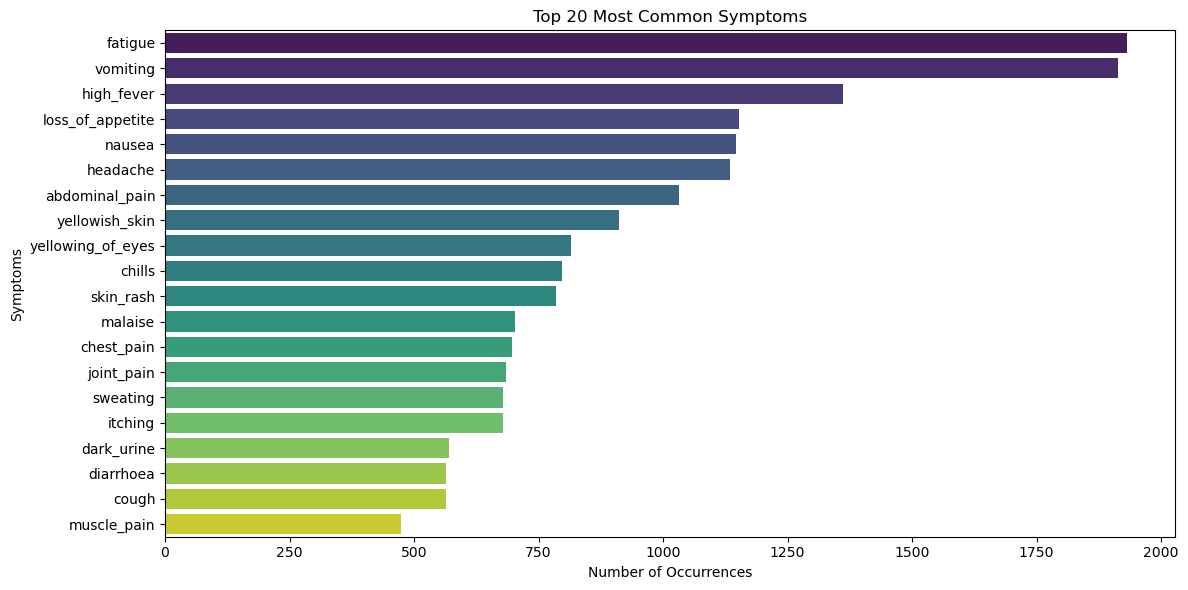

In [26]:
# Step 6: Visualize Top 20 Common Symptoms

symptom_counts = X.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts[:20].values, y=symptom_counts[:20].index, palette="viridis")
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Number of Occurrences")
plt.ylabel("Symptoms")
plt.tight_layout()
plt.show()


In [30]:
# Step 8: Prediction Function

def predict_disease(user_symptoms):
    input_data = [1 if symptom in user_symptoms else 0 for symptom in symptom_columns]
    pred = model.predict([input_data])[0]
    disease = le.inverse_transform([pred])[0]
    return f"🩺 Predicted Disease: {disease}"


In [32]:
# Step 9: Gradio Interface

gr.Interface(
    fn=predict_disease,
    inputs=gr.CheckboxGroup(choices=list(symptom_columns), label="Select Your Symptoms"),
    outputs="text",
    title="Disease Prediction System",
    description="Select symptoms and get the predicted disease instantly."
).launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
